# Leitura dos dados

In [1]:
import pandas as pd

PASTA = '.'

df = pd.read_parquet(f'{PASTA}/2.atributos.parquet',)

In [2]:
df.columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'cod_regiao_saude',
       'nome_regiao_saude', 'data', 'semana_epi', 'populacao_tcu_2019',
       'casos_acumulados', 'casos_novos', 'obitos_acumulados', 'obitos_novos',
       'interior_metropolitana', 'novos_casos_novos', 'z_score',
       'novos_casos_acumulados', 'ano', 'mes', 'mes_numerico', 'mes_traduzido',
       'dia_semana', 'dia_semana_traduzido', 'dia_semana_numerico', 'estacao'],
      dtype='object')

# Filtrar período

In [3]:
df = df[(df.data >= '03-01-2020') & (df.data < '03-01-2021')]

# Filtrar região

In [4]:
df = df[df.regiao == 'Sudeste']
map_estado = {
    'ES': 'Espírito Santo',
    'MG': 'Minas Gerais',
    'SP': 'São Paulo',
    'RJ': 'Rio de Janeiro'
}
df['nome_estado'] = df.estado.apply(lambda x: map_estado.get(x))

# Checagem de ouliers

In [5]:
print("Tamanho inicial df: ", len(df))

print(len(df[df.novos_casos_novos < 0]) / len(df) * 100, "% de casos negativos")
df = df[df.novos_casos_novos >= 0]
print("Após remover casos negativos: ", len(df))

print(len(df[df.obitos_novos < 0]) / len(df) * 100, "% de óbitos negativos")
df = df[df.obitos_novos >= 0]
print("Após remover óbitos negativos: ", len(df))

Tamanho inicial df:  562153
0.6859342563323507 % de casos negativos
Após remover casos negativos:  558297
0.2582854645466481 % de óbitos negativos
Após remover óbitos negativos:  556855


In [6]:
medias_casos = df.groupby("municipio").novos_casos_novos.mean().to_dict()
df['media_casos'] = df.municipio.apply(lambda x: medias_casos[x])

medias_obitos = df.groupby("municipio").obitos_novos.mean().to_dict()
df['media_obitos'] = df.municipio.apply(lambda x: medias_obitos[x])

cols = ['municipio', 'estado', 'novos_casos_novos', 'media_casos', 
        'obitos_novos', 'media_obitos']
display(df[df.novos_casos_novos > 100 * df.media_casos][cols])
df = df[df.novos_casos_novos <= 100 * df.media_casos]

,municipio,estado,novos_casos_novos,media_casos,obitos_novos,media_obitos
41015,Alpinópolis,MG,227,1.296407,0,0.026946
99780,Antônio Prado de Minas,MG,23,0.145833,0,0.008929
145690,Araújos,MG,114,1.017804,0,0.005935
257779,Belmiro Braga,MG,37,0.356287,0,0.008982
283104,Biquinhas,MG,14,0.083086,0,0.000000
...,...,...,...,...,...,...
2925847,Ubirajara,SP,573,2.167164,15,0.047761
2982775,Vera Cruz,SP,734,3.053254,51,0.189349
2986642,Veredinha,MG,17,0.100890,0,0.000000
2986660,Veredinha,MG,11,0.100890,0,0.000000


# Normalizar dados por 100.000 hab

In [7]:
df['incidencia_por_dia'] = df['novos_casos_novos'] / df['populacao_tcu_2019'] * 100_000
df['incidencia_acumulada'] = df['novos_casos_acumulados'] / df['populacao_tcu_2019'] * 100_000
df[['data', 'municipio', 'incidencia_por_dia', 'novos_casos_novos', 'populacao_tcu_2019']]

,data,municipio,incidencia_por_dia,novos_casos_novos,populacao_tcu_2019
102,2020-03-27,Abadia dos Dourados,0.0,0,6989.0
103,2020-03-28,Abadia dos Dourados,0.0,0,6989.0
104,2020-03-29,Abadia dos Dourados,0.0,0,6989.0
105,2020-03-30,Abadia dos Dourados,0.0,0,6989.0
106,2020-03-31,Abadia dos Dourados,0.0,0,6989.0
...,...,...,...,...,...
3062195,2021-02-24,Óleo,0.0,0,2496.0
3062196,2021-02-25,Óleo,0.0,0,2496.0
3062197,2021-02-26,Óleo,0.0,0,2496.0
3062198,2021-02-27,Óleo,0.0,0,2496.0


In [8]:
df['mortalidade'] = df['obitos_novos'] / df['populacao_tcu_2019'] * 100_000
df[['data', 'municipio', 'mortalidade', 'obitos_novos', 'populacao_tcu_2019']]

,data,municipio,mortalidade,obitos_novos,populacao_tcu_2019
102,2020-03-27,Abadia dos Dourados,0.0,0,6989.0
103,2020-03-28,Abadia dos Dourados,0.0,0,6989.0
104,2020-03-29,Abadia dos Dourados,0.0,0,6989.0
105,2020-03-30,Abadia dos Dourados,0.0,0,6989.0
106,2020-03-31,Abadia dos Dourados,0.0,0,6989.0
...,...,...,...,...,...
3062195,2021-02-24,Óleo,0.0,0,2496.0
3062196,2021-02-25,Óleo,0.0,0,2496.0
3062197,2021-02-26,Óleo,0.0,0,2496.0
3062198,2021-02-27,Óleo,0.0,0,2496.0


# Adicionar porte no municipio

In [9]:
def adicionar_porte_municipio(row):
  if row < 10_000:
    return "Pequeno I"
  
  if row >= 10_000 and row < 50_000:
    return "Pequeno II"
  
  if row >= 50_000 and row < 100_000:
    return "Médio"
  
  if row >= 100_000 and row < 500_000:
    return "Grande"
  
  return "Metrópole"

df['porte_municipio'] = df['populacao_tcu_2019'].apply(adicionar_porte_municipio)

# Gráficos

## Definições

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

def boxplot(y):
  order = ['Pequeno I', 'Pequeno II', 'Médio', 'Grande', 'Metrópole']
  estados = ["ES", "MG", "SP", "RJ"]

  fig, ax = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
  
  ax = ax.ravel()

  for i in range(len(estados)):
      estado = estados[i]
      df_filtered = df[df.estado == estado]
      sns.boxplot(data=df_filtered, 
                  x='porte_municipio', 
                  y=y, 
                  order=order, 
                  ax=ax[i],
                  showfliers=False)
      
      ax[i].set_title(map_estado.get(estado), fontsize=15)
      ax[i].set_xlabel('')
      ax[i].set_ylabel('Incidência por 100 mil habitantes', fontsize=15)
      ax[i].tick_params(labelsize=14)
      ax[i].spines['top'].set_visible(False)
      ax[i].spines['right'].set_visible(False)

  plt.tight_layout()
  plt.show()

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def line_3_4(y, df_feriados):
    estados = ["ES", "MG", "SP", "RJ"]

    capitais = {
        "ES": "Vitória",
        "MG": "Belo Horizonte",
        "SP": "São Paulo",
        "RJ": "Rio de Janeiro"
    }

    fig, ax = plt.subplots(4, 1, figsize=(12, 15))
    ax = ax.ravel()

    feriados_nacionais = df_feriados[df_feriados.localidade == 'BR'].data

    for i, estado in enumerate(estados):
        capital = capitais[estado]

        # Capital
        df_capital = df[df.municipio == capital]

        sns.lineplot(
            data=df_capital,
            x='data',
            y=y,
            ax=ax[i],
            color='blue',
            label='Capital'
        )

        # Média do Estado
        df_estado = df[df.estado == estado]
        df_estado_grouped = df_estado.groupby('data')[y].mean().reset_index()

        sns.lineplot(
            data=df_estado_grouped,
            x='data',
            y=y,
            ax=ax[i],
            color='orange',
            label='Média Estado'
        )

        # Feriados
        for f in feriados_nacionais:
            ax[i].axvline(x=f, color='green', linestyle='--', alpha=0.7)

        feriados_estaduais = df_feriados[df_feriados.localidade == estado].data
        for f in feriados_estaduais:
            ax[i].axvline(x=f, color='red', linestyle='--', alpha=0.7)

        ax[i].set_title(estado)
        ax[i].legend()

    plt.tight_layout()
    plt.show()


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def line_5():
    capitais = ["Vitória", "Belo Horizonte", "São Paulo","Rio de Janeiro"]
    metricas = ["incidencia", "mortalidade", "novos_casos_acumulados", "obitos_acumulados"]

    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    ax = ax.ravel()

    df_capitais = df[df.municipio.isin(capitais)]

    for i, metrica in enumerate(metricas):

        sns.lineplot(
            data=df_capitais,
            x='data',
            y=metrica,
            ax=ax[i],
            color='blue',
            hue='municipio'
        )

        ax[i].set_title(metrica)
        ax[i].legend()

    plt.tight_layout()
    plt.show()


In [13]:
def dispersao(df_leitos):
    capitais = {
        "ES": "Vitória",
        "MG": "Belo Horizonte",
        "SP": "São Paulo",
        "RJ": "Rio de Janeiro"
    }
    metricas = {'obitos_novos': 'sum', 'mortalidade': 'mean'}

    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    ax = ax.ravel()

    df_capitais = df[df.municipio.isin(capitais.values())].groupby(
        'municipio').agg(metricas).reset_index().rename(columns={'municipio': 'localidade'})
    df_plot_capitais = df_capitais.merge(df_leitos, on='localidade')

    sns.scatterplot(data=df_plot_capitais, hue='localidade',
                    x='n_leitos_uti_adulto', 
                    y='mortalidade', ax=ax[0]).set_title("Leitos por mortalidade nas capitais")
    sns.scatterplot(data=df_plot_capitais, hue='localidade',
                    x='n_leitos_uti_adulto', 
                    y='obitos_novos', ax=ax[1]).set_title("Leitos por óbitos nas capitais")

    
    df_estados = df[df.estado.isin(capitais.keys())].groupby(
        'estado').agg(metricas).reset_index().rename(columns={'estado': 'localidade'})
    
    df_plot_estados = df_estados.merge(df_leitos, on='localidade')

    sns.scatterplot(data=df_plot_estados, hue='localidade',
                    x='n_leitos_uti_adulto', 
                    y='mortalidade', ax=ax[2]).set_title("Leitos por mortalidade nos estados")
    sns.scatterplot(data=df_plot_estados, hue='localidade',
                    x='n_leitos_uti_adulto', 
                    y='obitos_novos', ax=ax[3]).set_title("Leitos por óbitos nos estados")

    plt.tight_layout()
    plt.show()

## Gráfico 1

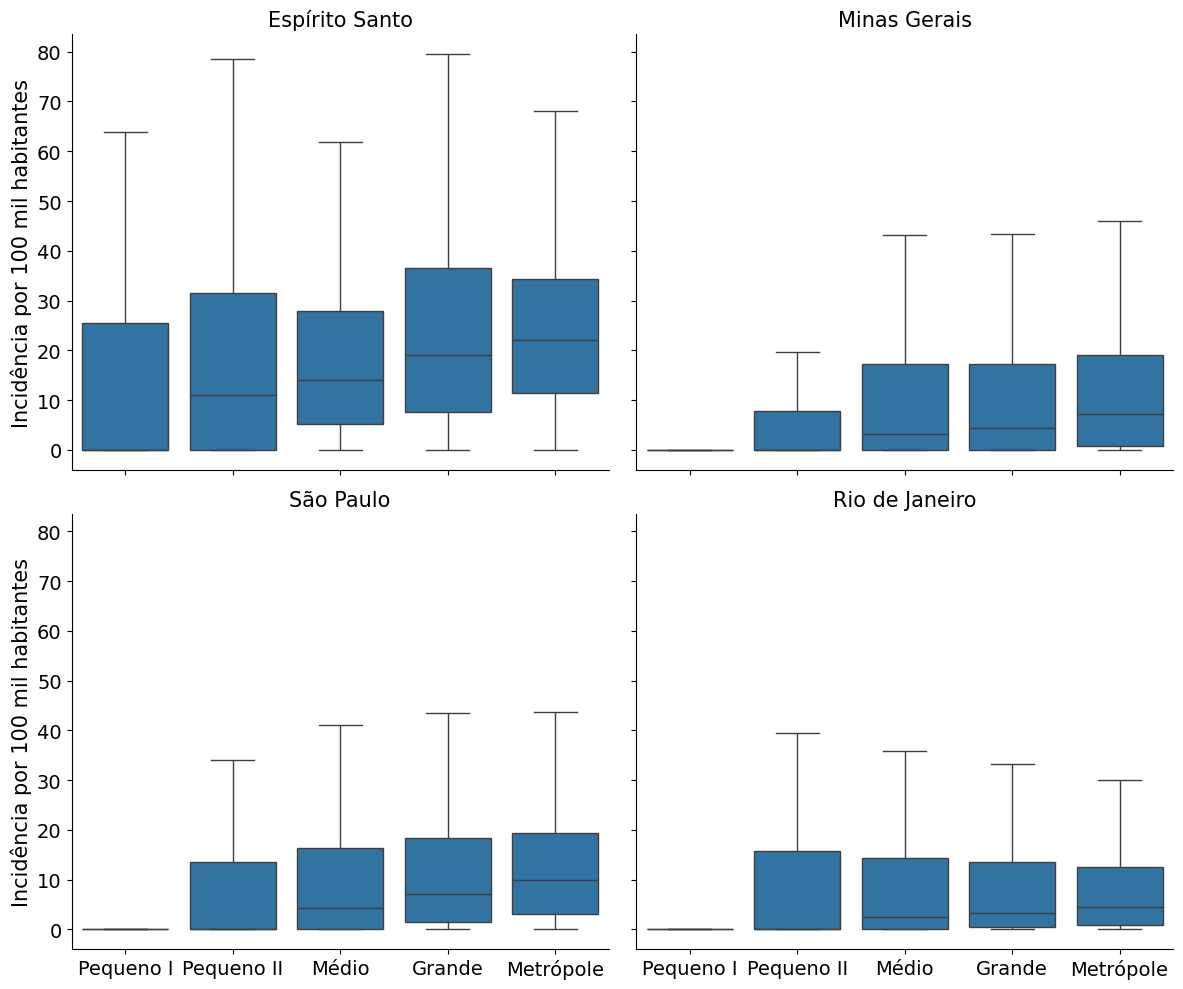

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

boxplot('incidencia_por_dia')

## Gráfico 2

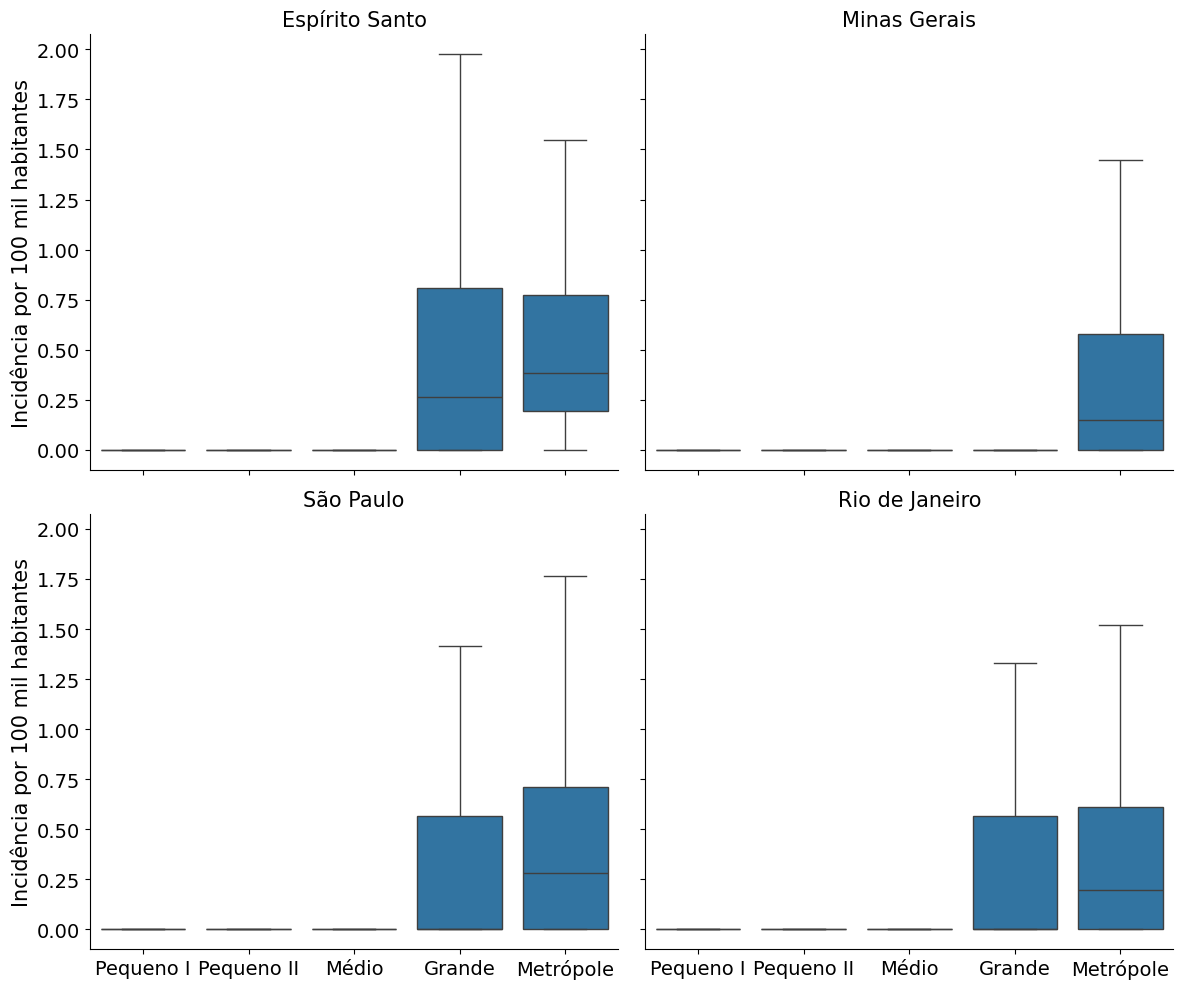

In [50]:
boxplot('mortalidade')

## Gráfico 3

In [16]:
df_feriados = pd.read_csv(f'{PASTA}/feriados.csv')
df_feriados['data'] = pd.to_datetime(df_feriados.data)
df_feriados.dtypes

data          datetime64[ns]
nome                  object
localidade            object
dtype: object

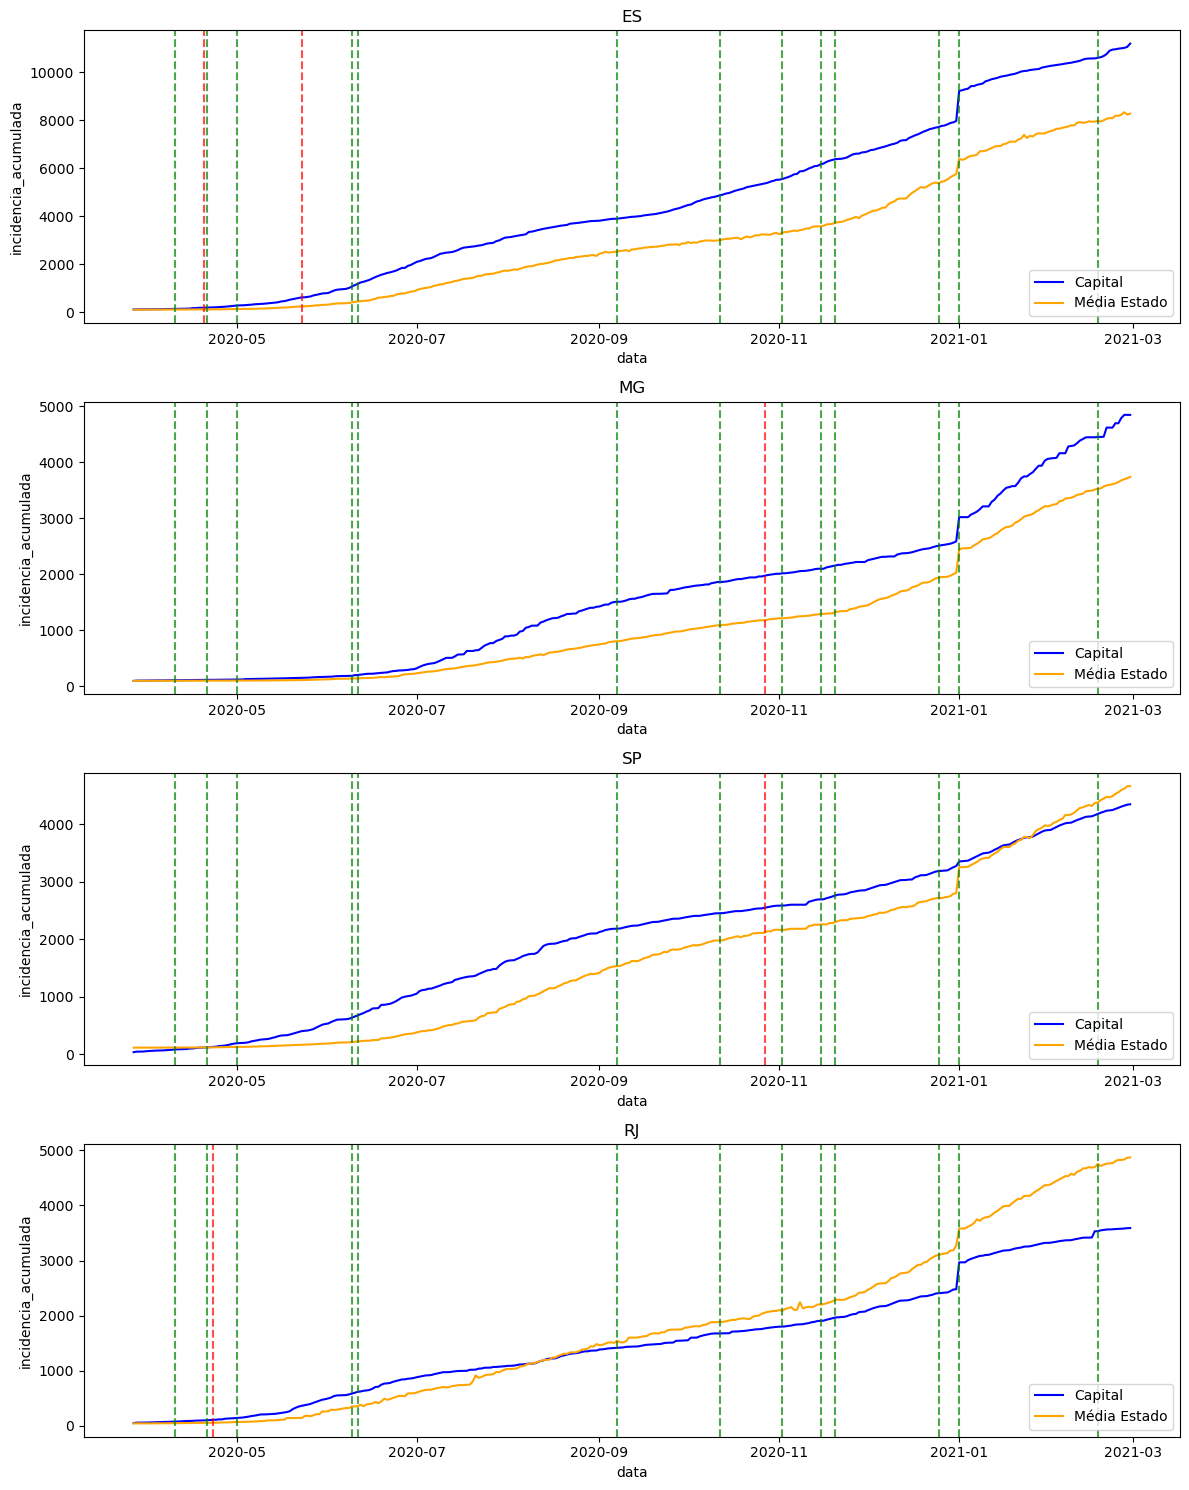

In [17]:
line_3_4('incidencia_acumulada', df_feriados)

## Gráfico 4

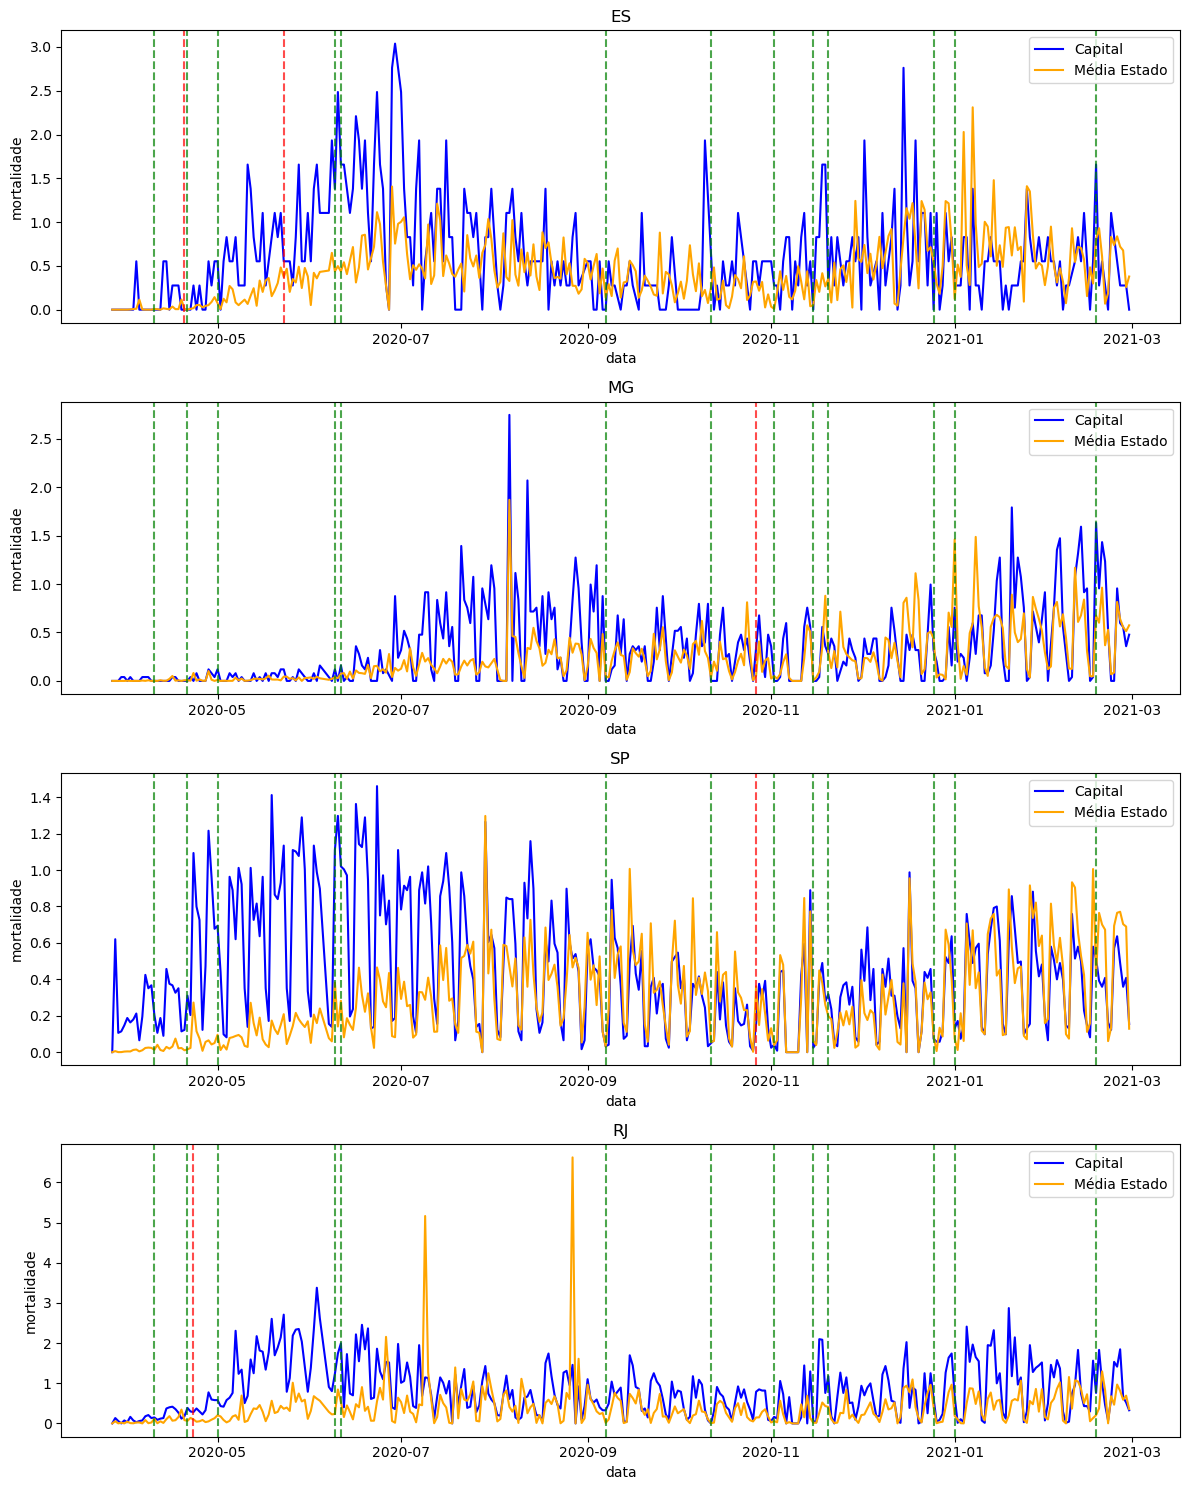

In [18]:
line_3_4('mortalidade', df_feriados)

## Gráfico 5

ValueError: Could not interpret value `incidencia` for `y`. An entry with this name does not appear in `data`.

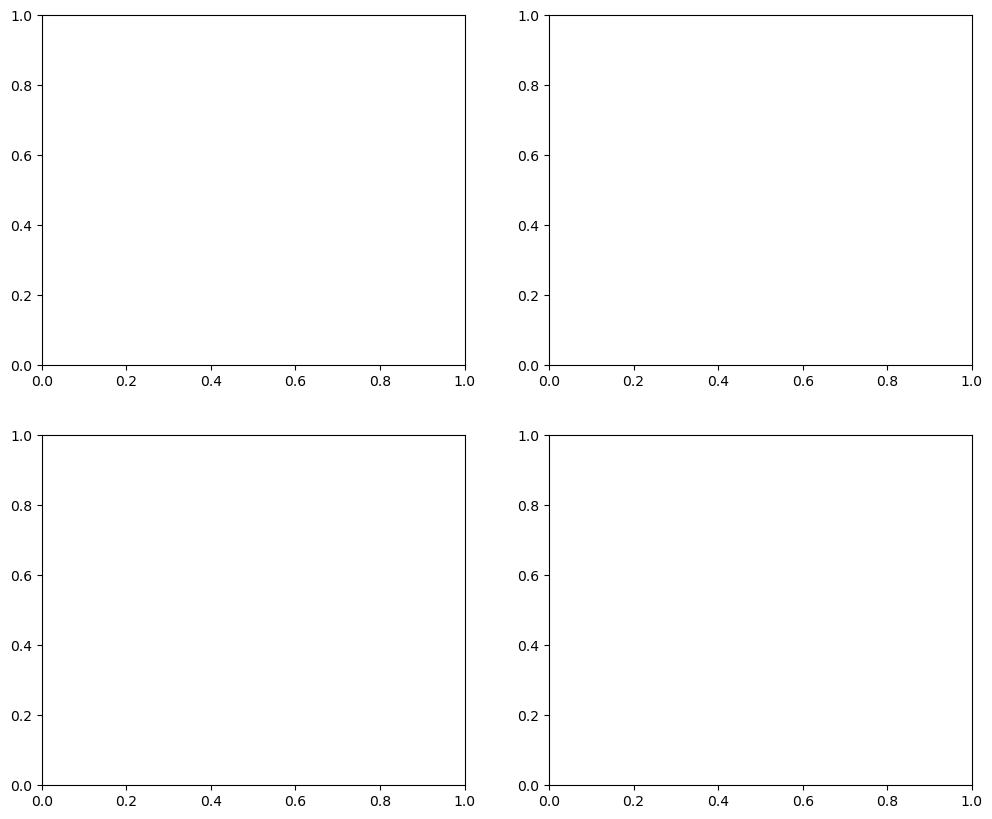

In [19]:
line_5()

## Gráfico 6

In [ ]:
df_leitos = pd.read_csv(f'{PASTA}/n_leitos.csv')
df_leitos

,n_leitos_uti_adulto,localidade
0,1167,ES
1,277,Vitória
2,4275,MG
3,1264,Belo Horizonte
4,5907,RJ
5,3043,Rio de Janeiro
6,11006,SP
7,4467,São Paulo


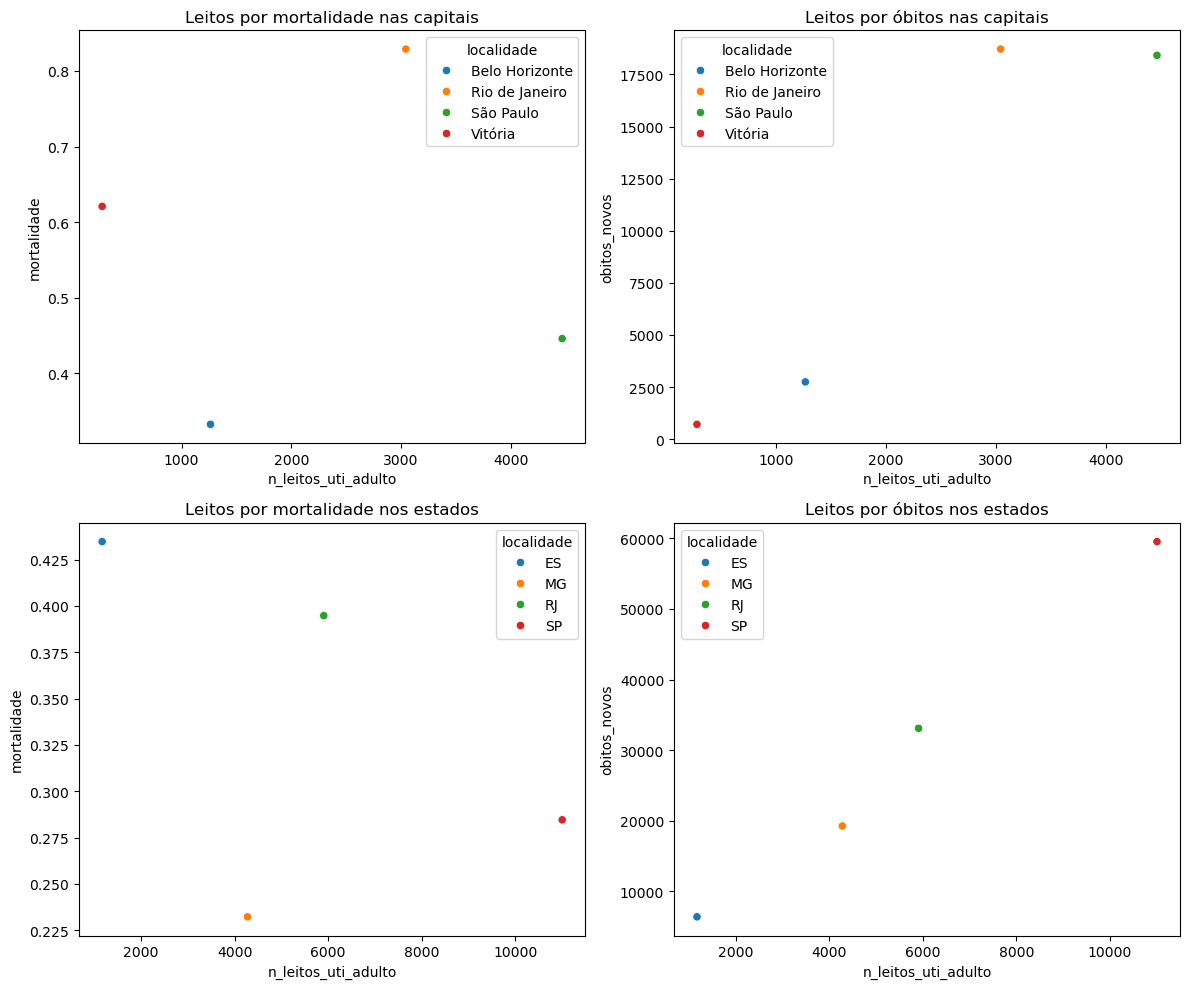

In [ ]:
dispersao(df_leitos)